## If you run this entire notebook it will take a long time to finish and require about 16 gigabytes of RAM. 

## Dataset is National Corrections Reporting Program, 1991-2014: Selected Variables (ICPSR 36404) - DS1:  Term Records


## Available here: http://www.icpsr.umich.edu/cgi-bin/bob/terms2?study=36404&ds=1&bundle=delimited&path=NACJD



In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
data_path = "36404-0001-Data.tsv"
#place the file in the same directory as the notebook

In [2]:
def build_df(filename):
    df = pd.read_csv(data_path, header=0, sep="\t")
    return df

In [145]:
df = build_df(data_path)

//anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [146]:
df = df.convert_objects(convert_numeric=True) # puts NAN on blank rows and converts to int64

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


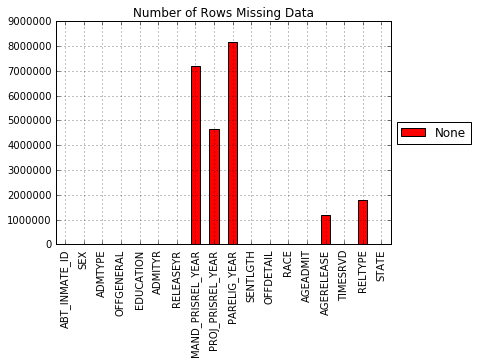

In [5]:
missing_data = df.isnull().sum()
missing_data.plot(kind='bar', color='Red', title="Number of Rows Missing Data", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

## As we can see from the above graph some columns such as PARELIG_YEAR are missing almost 80% of their values. Therefore, we cannot impute the values in this column as more data is missing than available. 

In [147]:
complete_rows = df.dropna() 

In [7]:
print(len(complete_rows))

720189


# Additionally, only 720,189 rows are complete which is only about 6% of the data. We will come back to this issue later for now let's make our data easier to read.

In [8]:
def convert_state_in_df(df):
    df.ix[(df.STATE == 1), 'STATE'] = 'Alabama'
    df.ix[(df.STATE == 2), 'STATE'] = 'Alaska'
    df.ix[(df.STATE == 4), 'STATE'] = 'Arizona'
    df.ix[(df.STATE == 5), 'STATE'] = 'Arkansas'
    df.ix[(df.STATE == 6), 'STATE'] = 'California'
    df.ix[(df.STATE == 8), 'STATE'] = 'Colorado'
    df.ix[(df.STATE == 9), 'STATE'] = 'Connecticut'
    df.ix[(df.STATE == 10), 'STATE'] = 'Delaware'
    df.ix[(df.STATE == 11), 'STATE'] = 'District of Columbia'
    df.ix[(df.STATE == 12), 'STATE'] = 'Florida'
    df.ix[(df.STATE == 13), 'STATE'] = 'Georgia'
    df.ix[(df.STATE == 15), 'STATE'] = 'Hawaii'
    df.ix[(df.STATE == 16), 'STATE'] = 'Idaho'
    df.ix[(df.STATE == 17), 'STATE'] = 'Illinois'
    df.ix[(df.STATE == 18), 'STATE'] = 'Indiana'
    df.ix[(df.STATE == 19), 'STATE'] = 'Iowa'
    df.ix[(df.STATE == 20), 'STATE'] = 'Kansas'
    df.ix[(df.STATE == 21), 'STATE'] = 'Kentucky'
    df.ix[(df.STATE == 22), 'STATE'] = 'Louisiana'
    df.ix[(df.STATE == 23), 'STATE'] = 'Maine'
    df.ix[(df.STATE == 24), 'STATE'] = 'Maryland'
    df.ix[(df.STATE == 25), 'STATE'] = 'Massachusetts'
    df.ix[(df.STATE == 26), 'STATE'] = 'Michigan'
    df.ix[(df.STATE == 27), 'STATE'] = 'Minnesota'
    df.ix[(df.STATE == 28), 'STATE'] = 'Mississippi'
    df.ix[(df.STATE == 29), 'STATE'] = 'Missouri'
    df.ix[(df.STATE == 30), 'STATE'] = 'Montana'
    df.ix[(df.STATE == 31), 'STATE'] = 'Nebraska'
    df.ix[(df.STATE == 32), 'STATE'] = 'Nevada'
    df.ix[(df.STATE == 33), 'STATE'] = 'New Hampshire'
    df.ix[(df.STATE == 34), 'STATE'] = 'New Jersey'
    df.ix[(df.STATE == 35), 'STATE'] = 'New Mexico'
    df.ix[(df.STATE == 36), 'STATE'] = 'New York'
    df.ix[(df.STATE == 37), 'STATE'] = 'North Carolina'
    df.ix[(df.STATE == 38), 'STATE'] = 'North Dakota'
    df.ix[(df.STATE == 39), 'STATE'] = 'Ohio'
    df.ix[(df.STATE == 40), 'STATE'] = 'Oklahoma'
    df.ix[(df.STATE == 41), 'STATE'] = 'Oregon'
    df.ix[(df.STATE == 42), 'STATE'] = 'Pennsylvania'
    df.ix[(df.STATE == 44), 'STATE'] = 'Rhode Island'
    df.ix[(df.STATE == 45), 'STATE'] = 'South Carolina'
    df.ix[(df.STATE == 46), 'STATE'] = 'South Dakota'
    df.ix[(df.STATE == 47), 'STATE'] = 'Tennessee'
    df.ix[(df.STATE == 48), 'STATE'] = 'Texas'
    df.ix[(df.STATE == 49), 'STATE'] = 'Utah'
    df.ix[(df.STATE == 50), 'STATE'] = 'Vermont'
    df.ix[(df.STATE == 51), 'STATE'] = 'Virgina'
    df.ix[(df.STATE == 53), 'STATE'] = 'Washington'
    df.ix[(df.STATE == 54), 'STATE'] = 'West Virginia'
    df.ix[(df.STATE == 55), 'STATE'] = 'Wisconsin'
    df.ix[(df.STATE == 56), 'STATE'] = 'Wyoming'

    return df

In [9]:
def add_sex_to_df(df):
    df.ix[(df.SEX == 1), 'SEX'] = 'Male'
    df.ix[(df.SEX == 2), 'SEX'] = 'Female'
    
    return df

In [10]:
def add_offgeneral_to_df(df):
    df.ix[(df.OFFGENERAL == 1), 'OFFGENERAL'] = 'Violent'
    df.ix[(df.OFFGENERAL == 2), 'OFFGENERAL'] = 'Property'
    df.ix[(df.OFFGENERAL == 3), 'OFFGENERAL'] = 'Drugs'
    df.ix[(df.OFFGENERAL == 4), 'OFFGENERAL'] = 'Public Order'
    df.ix[(df.OFFGENERAL == 5), 'OFFGENERAL'] = 'Other'
    df.ix[(df.OFFGENERAL == 9), 'OFFGENERAL'] = 'Missing'
    
    return df

In [11]:
def add_race_to_df(df):
    df.ix[(df.RACE == 1), 'RACE'] = 'White'
    df.ix[(df.RACE == 2), 'RACE'] = 'Black'
    df.ix[(df.RACE == 3), 'RACE'] = 'Hispanic'
    df.ix[(df.RACE == 4), 'RACE'] = 'Other'
    df.ix[(df.RACE == 9), 'RACE'] = 'Missing'
    
    return df

In [12]:
def add_sentlgth_to_df(df):
    df.ix[(df.SENTLGTH == 0), 'SENTLGTH'] = '0 - 1'
    df.ix[(df.SENTLGTH == 1), 'SENTLGTH'] = '1 - 1.9'
    df.ix[(df.SENTLGTH == 2), 'SENTLGTH'] = '2 - 4.9'
    df.ix[(df.SENTLGTH == 3), 'SENTLGTH'] = '5 - 9.9'
    df.ix[(df.SENTLGTH == 4), 'SENTLGTH'] = '10 - 24.9'
    df.ix[(df.SENTLGTH == 5), 'SENTLGTH'] = '25+'
    df.ix[(df.SENTLGTH == 6), 'SENTLGTH'] = 'Life'
    df.ix[(df.SENTLGTH == 9), 'SENTLGTH'] = 'Missing'
    
    return df

In [13]:
def add_off_detail_to_df(df):
    df.ix[(df.OFFDETAIL == 1), 'OFFDETAIL'] = 'Murder'
    df.ix[(df.OFFDETAIL == 2), 'OFFDETAIL'] = 'Negligent Manslaughter'
    df.ix[(df.OFFDETAIL == 3), 'OFFDETAIL'] = 'Rape / Sexual Assault'
    df.ix[(df.OFFDETAIL == 4), 'OFFDETAIL'] = 'Robbery'
    df.ix[(df.OFFDETAIL == 5), 'OFFDETAIL'] = 'Assault'
    df.ix[(df.OFFDETAIL == 6), 'OFFDETAIL'] = 'Other Violent'
    df.ix[(df.OFFDETAIL == 7), 'OFFDETAIL'] = 'Burglary'
    df.ix[(df.OFFDETAIL == 8), 'OFFDETAIL'] = 'Larceny'
    df.ix[(df.OFFDETAIL == 9), 'OFFDETAIL'] = 'GTA'
    df.ix[(df.OFFDETAIL == 10), 'OFFDETAIL'] = 'Fraud'
    df.ix[(df.OFFDETAIL == 11), 'OFFDETAIL'] = 'Other Property'
    df.ix[(df.OFFDETAIL == 12), 'OFFDETAIL'] = 'Drugs'
    df.ix[(df.OFFDETAIL == 13), 'OFFDETAIL'] = 'Public Order'
    df.ix[(df.OFFDETAIL == 14), 'OFFDETAIL'] = 'Other'
    df.ix[(df.OFFDETAIL == 99), 'OFFDETAIL'] = 'Missing'
   
    return df

In [14]:
df = add_race_to_df(df)
df = add_offgeneral_to_df(df)
df = add_sex_to_df(df)
df = convert_state_in_df(df)
df = add_sentlgth_to_df(df)
df['count'] = 1

In [98]:
df = add_off_detail_to_df(df)

# Next I add in class_label to mark repeat offenders where 2 means they are a repeat offender and 1 means they are not a repeat offender

In [71]:
dup = df.set_index('ABT_INMATE_ID').index.duplicated(keep=False)
dup = dup * 1
class_label = [x + 1 for x in dup]
se = pd.Series(class_label)
df.insert(0, 'class_label', se.values)
# df.drop('ABT_INMATE_ID', axis=1, inplace = True)

# Basic Visuals and Statistics

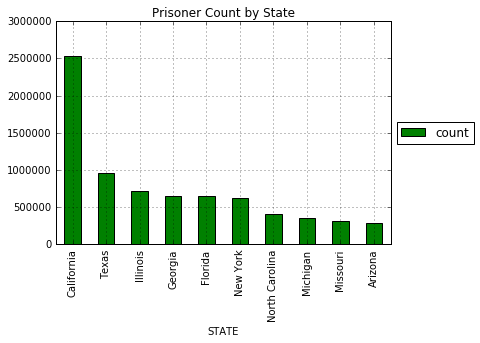

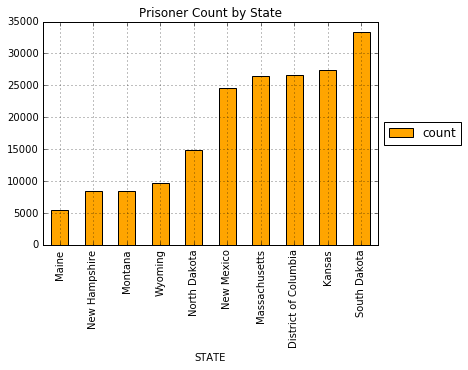

In [75]:
state_stats = df.groupby(by=['STATE'])['count'].sum().nlargest(10)
state_stats.plot(kind='bar', color='green', title="High Prisoner Count by State", stacked=False, grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
state_stats2 = df.groupby(by=['STATE'])['count'].sum().nsmallest(10)
state_stats2.plot(kind='bar', color='orange', title="Low Prisoner Count by State", stacked=False, grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

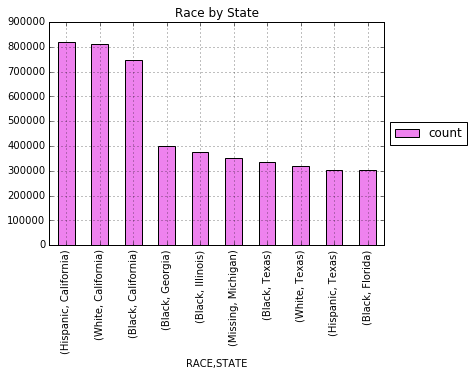

In [85]:
race_by_state = df.groupby(by=['RACE', 'STATE'])['count'].sum().nlargest(10)
race_by_state.plot(kind='bar', color='violet', title="Race by State", stacked=False, grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

## States appear to be locking up an equal number of black, white, and hispanic people. We'd need more information about specific state demographics, but it initially appears that some groups are over represented. 

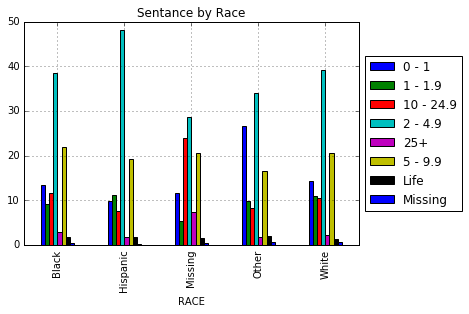

In [90]:
sentance_length_by_race = pd.crosstab(df.RACE, df.SENTLGTH, margins=False).apply(lambda r: r/(r.sum()) * 100, axis=1)
sentance_length_by_race.plot(kind='bar', title="Sentance by Race", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

## I expected there to be some racial bias in sentancing, but that does not appear to be the case. This is more clearly illustrated in the crosstab below

In [91]:
sentance_length_by_race

SENTLGTH,0 - 1,1 - 1.9,10 - 24.9,2 - 4.9,25+,5 - 9.9,Life,Missing
RACE,,,,,,,,
Black,13.452908,9.101673,11.580064,38.617899,2.968310,22.018191,1.752757,0.508198
Hispanic,9.946263,11.103155,7.653948,48.102016,1.878019,19.360450,1.775519,0.180630
Missing,11.614201,5.339084,24.076792,28.722387,7.404945,20.686627,1.685146,0.470818
Other,26.586445,9.963377,8.280232,33.987095,1.861118,16.542577,2.107061,0.672095
White,14.295786,10.993842,10.488890,39.322407,2.232418,20.728668,1.299821,0.638169


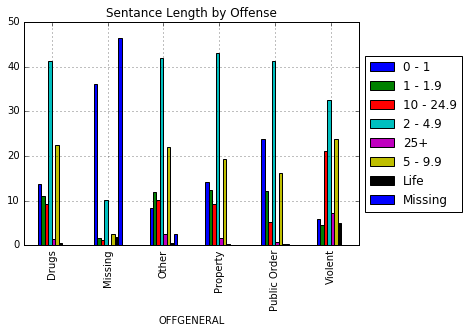

In [92]:
sentance_length_by_offense = pd.crosstab(df.OFFGENERAL, df.SENTLGTH, margins=False).apply(lambda r: r/(r.sum()) * 100, axis=1)
sentance_length_by_offense.plot(kind='bar', title="Sentance Length by Offense", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [93]:
sentance_length_by_offense

SENTLGTH,0 - 1,1 - 1.9,10 - 24.9,2 - 4.9,25+,5 - 9.9,Life,Missing
OFFGENERAL,,,,,,,,
Drugs,13.681003,11.017551,9.276840,41.358339,1.513696,22.494780,0.520735,0.137056
Missing,36.080674,1.692910,1.192924,10.063097,0.170418,2.502746,1.856286,46.440945
Other,8.303531,11.916562,10.197440,41.900578,2.533261,22.089854,0.564608,2.494164
Property,14.268174,12.343258,9.165766,43.076718,1.575717,19.243617,0.195987,0.130764
Public Order,23.732960,12.088864,5.286476,41.321555,0.827589,16.183378,0.190258,0.368921
Violent,5.788639,4.459756,21.032803,32.595915,7.209000,23.785353,4.952593,0.175939


# Interesting that 2-4.9 years is the most common sentance for any offense. Also notice how much higher life sentance is for violent when compared to other crimes. 

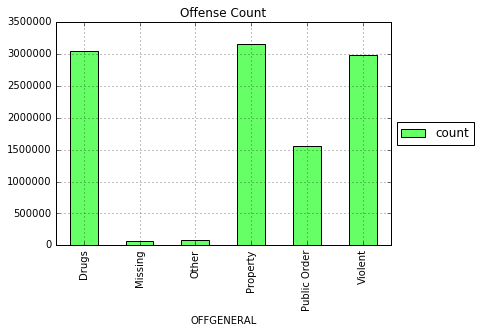

In [96]:
offense_stats = df.groupby(by=['OFFGENERAL'])['count'].sum()
offense_stats.plot(kind='bar', color='#66ff66', title="Offense Count", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

## We can clearly see that we are locking up more non-violent drug offenders than violent offenders. Interestingly property offenses are the most common. Let's take another look at offense verse sentence length. 

In [120]:
# THE GRAPHS WORKS BUT HAVE A LOT OF DATA SO IT'S HARD TO DRAW CONCLUSIONS
# from pylab import rcParams
# rcParams['figure.figsize'] = 14, 10
# sentance_length_by_offense_detail = pd.crosstab(df.OFFDETAIL, df.SENTLGTH, margins=False).apply(lambda r: r/(r.sum()) * 100, axis=1)
# sentance_length_by_offense_detail.plot(kind='bar', title="Sentance Length by Offense Detail", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [121]:
# sentance_length_by_offense_detail.plot(kind='bar', title="Sentance Length by Offense Detail", stacked=True, grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [125]:
rcParams['figure.figsize'] = 10, 5
sentance_length_by_offense_detail

SENTLGTH,0 - 1,1 - 1.9,10 - 24.9,2 - 4.9,25+,5 - 9.9,Life,Missing
OFFDETAIL,,,,,,,,
Assault,10.826631,6.337671,11.659781,47.298930,2.328681,20.689201,0.742615,0.116491
Burglary,8.809195,8.301510,13.721045,41.560686,2.621558,24.496743,0.362520,0.126744
Drugs,13.681003,11.017551,9.276840,41.358339,1.513696,22.494780,0.520735,0.137056
Fraud,19.501422,13.416317,8.175684,40.064343,1.260291,17.347805,0.064613,0.169525
GTA,10.739043,17.535598,3.326040,51.872265,0.715427,15.708828,0.048274,0.054525
Larceny,20.193848,15.318514,5.302954,44.517715,0.695440,13.756000,0.082572,0.132956
Missing,36.080674,1.692910,1.192924,10.063097,0.170418,2.502746,1.856286,46.440945
Murder,0.878522,0.237286,26.744420,2.720663,22.228931,10.963867,35.414526,0.811785
Negligent Manslaughter,2.391671,2.950140,34.759673,26.265064,5.491870,27.425318,0.652836,0.063427


## Comparing drugs to assault or fraud we can see some interesting results. It appears that most drugs offenses warrent longer sentances than assault or fraud

In [132]:
sex_stats = df.groupby(by=['SEX'])['count'].sum()
sex_stats

SEX
Female    1147078
Male      9759759
Name: count, dtype: int64

# 10.5 % Women
# 90.5 % Men

## Incredible that there is such a large difference

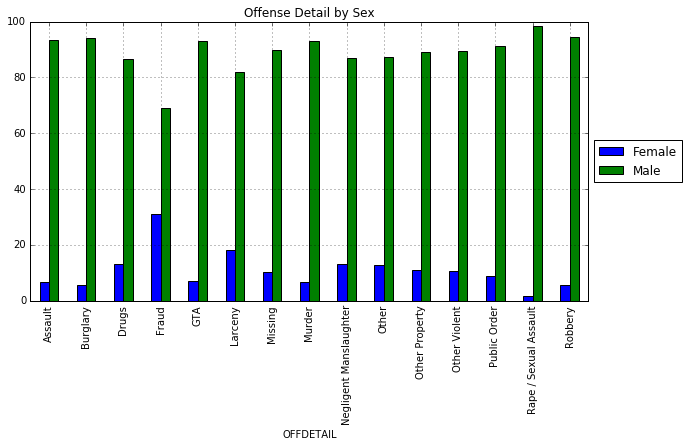

In [128]:
offense_detail_vs_sex = pd.crosstab(df.OFFDETAIL, df.SEX, margins=False).apply(lambda r: r/(r.sum()) * 100, axis=1)
offense_detail_vs_sex.plot(kind='bar', title="Offense Detail by Sex", grid=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [133]:
repeat_offenders = df.groupby(by=['class_label'])['count'].sum()
repeat_offenders

class_label
1    3925136
2    6981701
Name: count, dtype: int64

# 64% are repeat offenders

# Let’s see if we can figure out what characteristics are the best predictors of whether someone will be a repeat offender.

# I will use the complete rows from the original data as my sample. I used   logistic regression because there are only 2 labels. 

In [148]:
repeat = complete_rows.set_index('ABT_INMATE_ID').index.duplicated(keep=False)
repeat = repeat * 1
class_label = [x + 1 for x in repeat]
se = pd.Series(class_label)
complete_rows.insert(0, 'class_label', se.values)
complete_rows.drop('ABT_INMATE_ID', axis=1, inplace = True) # drop the ID because it's a unique value

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Now I remove all the rows that have "missing"

In [149]:
complete_rows = complete_rows[complete_rows.RELEASEYR != 9999]
complete_rows = complete_rows[complete_rows.ADMTYPE != 9]
complete_rows = complete_rows[complete_rows.OFFGENERAL != 9]
complete_rows = complete_rows[complete_rows.ADMITYR != 9999]
complete_rows = complete_rows[complete_rows.OFFDETAIL != 99]
complete_rows = complete_rows[complete_rows.RACE != 9]
complete_rows = complete_rows[complete_rows.AGEADMIT != 9]
complete_rows.drop('EDUCATION', axis=1, inplace=True) # missing all values
complete_rows = complete_rows[complete_rows.MAND_PRISREL_YEAR != 9999]
complete_rows = complete_rows[complete_rows.PROJ_PRISREL_YEAR != 9999]
complete_rows = complete_rows[complete_rows.PARELIG_YEAR != 9999]
complete_rows = complete_rows[complete_rows.OFFDETAIL != 9]
complete_rows = complete_rows[complete_rows.SENTLGTH != 9]
complete_rows = complete_rows[complete_rows.AGERELEASE != 9]
complete_rows = complete_rows[complete_rows.RELTYPE != 9]

# Now we need to Standardize our data. Complete rows still has over 660k rows which is too much so I'll take a sample.

In [150]:
# take 10% of complete rows 
sample = complete_rows.sample(frac=0.10, random_state=0)

# Split into Training and Test data

In [102]:
# test set is 20%
from sklearn.cross_validation import train_test_split
X, y = sample.iloc[:, 1:].values, sample.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Standardize Values so larger numbers such as year don't skew the results

In [103]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Calculate Accuracy

In [28]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.639990923187
Test accuracy: 0.645942061871


# At this point I was disappointed with the results so I decided to explore the importance of each feature. The dataset currently has 16 dimensions. To evaluate each variable I used a random forest to see which variables are the most important to predict repeat offenders. 

In [20]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = complete_rows.columns[1:]
forest = RandomForestClassifier(n_estimators=1000, max_depth=5,  random_state=0, n_jobs=1)

In [56]:
%%time
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print ("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))

 1) SEX                            0.273661
 2) ADMTYPE                        0.269934
 3) OFFGENERAL                     0.106134
 4) ADMITYR                        0.095203
 5) RELEASEYR                      0.092483
 6) MAND_PRISREL_YEAR              0.038753
 7) PROJ_PRISREL_YEAR              0.023060
 8) PARELIG_YEAR                   0.019957
 9) SENTLGTH                       0.018406
10) OFFDETAIL                      0.016320
11) RACE                           0.014892
12) AGEADMIT                       0.012895
13) AGERELEASE                     0.005550
14) TIMESRVD                       0.004666
15) RELTYPE                        0.004262
16) STATE                          0.003822
CPU times: user 39.4 s, sys: 571 ms, total: 39.9 s
Wall time: 41.5 s


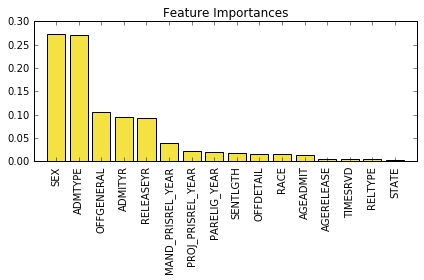

In [57]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='#f4e242', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Checking results using KNN and Sequential Backward Selection

In [104]:
from sklearn.base import clone
from itertools import combinations
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [105]:
# Not in Sklearn
class SBS():
    def __init__(self, estimator, k_features,
                 scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
            
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r = (dim - 1)):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self


    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [111]:
# Takes about 10 minutes to run
from sklearn.neighbors import KNeighborsClassifier
%timeit
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

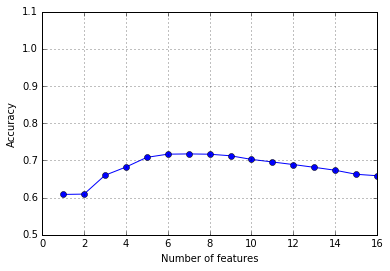

In [112]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.5, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [113]:
sbs.scores_

[0.65880039331366769,
 0.6627335299901671,
 0.67354965585054083,
 0.68141592920353977,
 0.68882837909386585,
 0.69578700552151884,
 0.70274563194917172,
 0.7124271991528629,
 0.71666288480447771,
 0.71741925724226607,
 0.71673852204825661,
 0.70819151350124798,
 0.68209666439754935,
 0.66001058921412903,
 0.60940927312608728,
 0.60850162620074122]

In [91]:
k1 = list(sbs.subsets_[10])
print(sample.columns[1:][k1])

Index(['ADMTYPE', 'RELEASEYR', 'MAND_PRISREL_YEAR', 'PARELIG_YEAR', 'TIMESRVD',
       'STATE'],
      dtype='object')


# The above code shows the 6 features that result in the best accuracy score. This implies that we can remove 10 feature from our dataset. Let's try it

In [22]:
# reduce to 6 dimensions
def drop_columns_for_lr(df):
    df.drop('STATE', axis=1, inplace=True)
    df.drop('RELTYPE', axis=1, inplace=True)
    df.drop('TIMESRVD', axis=1, inplace=True)
    df.drop('AGERELEASE', axis=1, inplace=True)
    df.drop('AGEADMIT', axis=1, inplace=True)
    df.drop('RACE', axis=1, inplace=True)
    df.drop('OFFDETAIL', axis=1, inplace=True)
    df.drop('SENTLGTH', axis=1, inplace=True)
    df.drop('PARELIG_YEAR', axis=1, inplace=True)
    df.drop('PROJ_PRISREL_YEAR', axis=1, inplace=True)
    return df

In [47]:
# since we are dropping columns we need to make a copy of the df
copy = complete_rows.copy()
copy2 = complete_rows.copy()

In [168]:
male_df = complete_rows.copy()
female_df = complete_rows.copy()

In [48]:
smaller_lr = drop_columns_for_lr(copy)

# Since we reduced the dimensionality of the set we can now run logistic regression on the entire set smaller_lr

In [49]:
X, y = smaller_lr.iloc[:, 1:].values, smaller_lr.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
LogisticRegression(penalty='l1')
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.637769322991
Test accuracy: 0.636569924437


## We removed 10 dimensions but only lost ~1% in our accuracy which is amazing

In [50]:
def drop_columns_for_knn(df):
    df.drop('SEX', axis=1, inplace=True)
    df.drop('OFFGENERAL', axis=1, inplace=True)
    df.drop('ADMITYR', axis=1, inplace=True)
    df.drop('AGEADMIT', axis=1, inplace=True)
    df.drop('RACE', axis=1, inplace=True)
    df.drop('OFFDETAIL', axis=1, inplace=True)
    df.drop('PROJ_PRISREL_YEAR', axis=1, inplace=True)
    df.drop('AGERELEASE', axis=1, inplace=True)
    df.drop('RELTYPE', axis=1, inplace=True)
    df.drop('SENTLGTH', axis=1, inplace=True)
    
    return df

In [51]:
smaller_knn = drop_columns_for_knn(copy2)

In [97]:
knn_sample = smaller_knn.sample(frac=0.20, random_state=0)

# Increase n_neighbors to 7 and doubled the sample size

In [98]:
%%time
X, y = knn_sample.iloc[:, 1:].values, knn_sample.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=7)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

CPU times: user 1min 9s, sys: 677 ms, total: 1min 10s
Wall time: 1min 20s


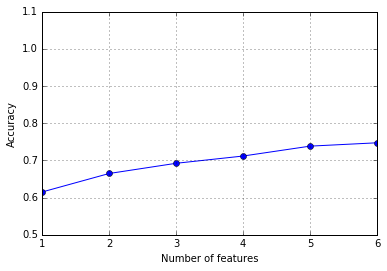

In [99]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.5, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [100]:
sbs.scores_

[0.74733378715679599,
 0.73833295514711439,
 0.71174646395885333,
 0.6922320550639135,
 0.66481355419408517,
 0.61515770365327882]

# KNN Another Try

## Here I split the dataset into two seperate dataframes one for male prisoners and one for female. 

In [151]:
def remove_women(df, string=False):
    if string:
        filter = df["SEX"] != 'Female'
    else:
        filter = df["SEX"] != 2
    
    df = df[filter]
    return df

def remove_men(df, string=False):
    if string:
        filter = df["SEX"] != "Male"
    else:
        filter = df["SEX"] != 1
    
    df = df[filter]
    return df

In [169]:
male_df = remove_women(male_df)
female_df = remove_men(female_df)
male_df.drop('SEX', axis=1, inplace=True)
female_df.drop('SEX', axis=1, inplace=True)

## Now we can analyze each features value in the seperate dataframes to see if we can get better predictions or if different features become more or less valuable. 

# Men KNN

In [171]:
%%time
male_sample = male_df.sample(frac=0.10, random_state=0) 
X, y = male_sample.iloc[:, 1:].values, male_sample.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

CPU times: user 4min 42s, sys: 1.93 s, total: 4min 44s
Wall time: 6min 24s


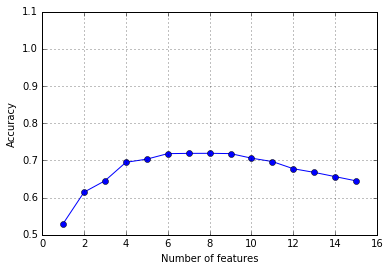

In [172]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.5, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [173]:
sbs.scores_

[0.64500941619585683,
 0.65639445300462251,
 0.66777948981338808,
 0.6776236945728471,
 0.69688409518917993,
 0.7060434857045027,
 0.71828454031843858,
 0.71905495634309191,
 0.71888375278205785,
 0.71819893853792161,
 0.70338983050847459,
 0.69482965245677109,
 0.64526622153740798,
 0.61462078411230958,
 0.52996062318096215]

## It appears that 6 features is still the best, let's see if they are the same six.

In [176]:
k1 = list(sbs.subsets_[9])
print(male_sample.columns[1:][k1])

Index(['ADMTYPE', 'ADMITYR', 'MAND_PRISREL_YEAR', 'PARELIG_YEAR', 'TIMESRVD',
       'STATE'],
      dtype='object')


### 'ADMTYPE', 'RELEASEYR', 'MAND_PRISREL_YEAR', 'PARELIG_YEAR', 'TIMESRVD', 'STATE'

### VS

### ADMTYPE', 'ADMITYR', 'MAND_PRISREL_YEAR', 'PARELIG_YEAR', 'TIMESRVD', 'STATE'

The whole group and the male group share all but one common feature "ADMITYR". Interestingly the accuracy is almost exactly the same 71.7% vs 71.8%. 

# Men's Random Forest

In [186]:
feat_labels = male_sample.columns[1:]
forest = RandomForestClassifier(n_estimators=1000, max_depth=7,  random_state=0, n_jobs=1)

In [187]:
%%time
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print ("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))

 1) ADMTYPE                        0.254524
 2) OFFGENERAL                     0.213256
 3) ADMITYR                        0.119919
 4) RELEASEYR                      0.103387
 5) MAND_PRISREL_YEAR              0.079867
 6) PROJ_PRISREL_YEAR              0.047442
 7) PARELIG_YEAR                   0.031747
 8) SENTLGTH                       0.028873
 9) OFFDETAIL                      0.027470
10) RACE                           0.024640
11) AGEADMIT                       0.024065
12) AGERELEASE                     0.016338
13) TIMESRVD                       0.010263
14) RELTYPE                        0.009174
15) STATE                          0.009035
CPU times: user 33.4 s, sys: 227 ms, total: 33.6 s
Wall time: 34.3 s


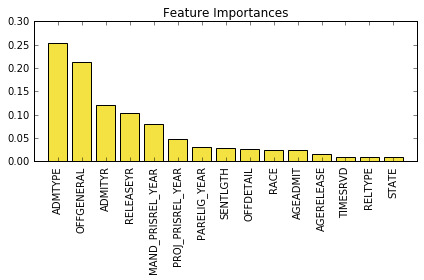

In [188]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='#f4e242', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

### Random forest classified feature importance in the exact same order even though the set only contains men now.

# Men's Logistic Regression

In [189]:
LogisticRegression(penalty='l1')
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.644260400616
Test accuracy: 0.639958911145


### Almost exactly the same accuracy as before




# Women's KNN

In [190]:
# Almost 10 minutes to run
# Ran on entire group of women not a sample
%%time
X, y = female_df.iloc[:, 1:].values, female_df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

CPU times: user 7min 39s, sys: 3.59 s, total: 7min 43s
Wall time: 9min 52s


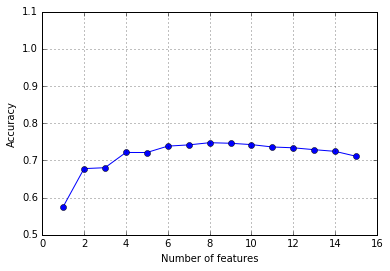

In [191]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.5, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [192]:
sbs.scores_

[0.71105478650809129,
 0.72431273152661335,
 0.72879703645934879,
 0.73386625073113665,
 0.73607590823422364,
 0.74244492103723925,
 0.74608435692467667,
 0.74757912523558845,
 0.74166504191850258,
 0.73835055566387209,
 0.721193215051667,
 0.7213231949047898,
 0.68037954117111843,
 0.67790992396178595,
 0.57529082992136216]

## Eight features provides the best results with 74.75% accuracy which is a 3 percent improvement over the mens set and the total set.

In [194]:
k1 = list(sbs.subsets_[7])
print(female_df.columns[1:][k1])

Index(['ADMTYPE', 'RELEASEYR', 'MAND_PRISREL_YEAR', 'PARELIG_YEAR', 'SENTLGTH',
       'TIMESRVD', 'RELTYPE', 'STATE'],
      dtype='object')


## We see that the womens results vary in that there are two extra features "SENTLGTH" AND "RELTYPE" other than that the features are identical. So it appears there is some correlation between these values and repeat female offenders. 

# Women's Random Forest

In [195]:
feat_labels = female_df.columns[1:]
forest = RandomForestClassifier(n_estimators=2000, max_depth=7,  random_state=0, n_jobs=1)

In [196]:
%%time
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print ("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))

 1) ADMTYPE                        0.215934
 2) OFFGENERAL                     0.184211
 3) ADMITYR                        0.176604
 4) RELEASEYR                      0.117496
 5) MAND_PRISREL_YEAR              0.070212
 6) PROJ_PRISREL_YEAR              0.056362
 7) PARELIG_YEAR                   0.050029
 8) SENTLGTH                       0.035556
 9) OFFDETAIL                      0.021846
10) RACE                           0.019682
11) AGEADMIT                       0.013907
12) AGERELEASE                     0.013781
13) TIMESRVD                       0.009618
14) RELTYPE                        0.008661
15) STATE                          0.006100
CPU times: user 1min 34s, sys: 2.75 s, total: 1min 37s
Wall time: 2min 22s


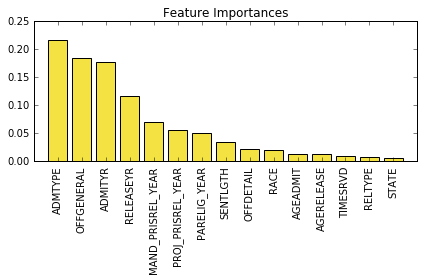

In [197]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='#f4e242', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## Features are ranked in the same order as before. However, the first few features became less valuable and features such as sentence length became more valuable. 

# Women's Logistic Regression

In [199]:
LogisticRegression(penalty='l1')
lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.697083434885
Test accuracy: 0.695392214207


In [201]:
def drop_columns_for_knn_women(df):
    df.drop('OFFGENERAL', axis=1, inplace=True)
    df.drop('ADMITYR', axis=1, inplace=True)
    df.drop('AGEADMIT', axis=1, inplace=True)
    df.drop('RACE', axis=1, inplace=True)
    df.drop('OFFDETAIL', axis=1, inplace=True)
    df.drop('PROJ_PRISREL_YEAR', axis=1, inplace=True)
    df.drop('AGERELEASE', axis=1, inplace=True)
    
    return df

In [202]:
female_df = drop_columns_for_knn_women(female_df)

In [219]:
%%time
X, y = female_df.iloc[:, 1:].values, female_df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=19)
sbs = SBS(knn, k_features=8)
sbs.fit(X_train_std, y_train)

CPU times: user 2.28 s, sys: 32.5 ms, total: 2.31 s
Wall time: 2.4 s


In [220]:
sbs.scores_

[0.76394562876030603]

## Overall I am a little dissapointed that my results weren't more accurate. I do think machine learning presents interesting moral questions. Such as would it be acceptable to use an algorithm like this? How should it be used? How accurate does it need to be? It turns out that many states are currently using machine learning to help make parole decisions.  

## More information can be found here
http://www.wsj.com/articles/SB10001424052702304626104579121251595240852

## Actual software company
http://www.northpointeinc.com/products/northpointe-software-suite

## I think that additional data about the prisoners, as well as more accurate data would provide more accurate results. Northpointe uses a survey that they have prisoners fill out as well as some additional data. 